In our project we have to detect the real time emotions of students so that teachers can understand if students are able to grasp the topic according to students expressions or emotions.
So in our project , we first train the model on specific dataset through CNN , then with the help of opencv we capture the real time image , then apply our trained model on that image to detect the emotion of the person .
We made the frontend with the help of streamlit and deployed the entire model on heruko cloud.

In this ipynb file we will train the model on a dataset.

The dataset consists of 2 folders - training and test
All the images of dataset are grayscale images of size 48,48
Both these folders consist of 7 folders each- angry ,disguist,fear,happy,neutral,sad,suprise
All these 7 folders contain images of peoples faces with respective emotion.

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator          

In [2]:
tf.__version__

'2.3.0'

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
'''We create an instance train_datagen , and with the help of ImageDataGenerator class we apply preprocessing techniques 
  rescaling - feature scaling on each pixels, zoom etc.
  various transformation like shear_range , zoom_range, horizontal_flip  so that model desent overfit)
  ''' 

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)





#  train_datagen object is connected to training datset with help of flow_from_directory method
#  size of all images is converted to 48,48
#  batch-size was kept as 32. We tried different batch-size and 32 gave maximum accuracy.
#  class_mode is kept as categorical since there are more then 2 classes

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (48, 48),
                                             
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


### Preprocessing the Test set

In [5]:
"""  We are not going to do any transformations on test images as they are treated as new images which 
  will be received from live webcam without any transformation, so that we can get exact accuracy of our model """

test_datagen = ImageDataGenerator(rescale = 1./255)



test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (48, 48),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[48,48,3]))

# 32 = no of feature dectotor , no of feature map                                                                              
# 3 (channels) since we have coloured image r,g,b        

           

### Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding 2 more convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



### Step 3 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))     # 128 = no of nodes in hidden layer

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=7, activation='softmax'))
# 7 = no of nodes in output layer
# activation = softmax since more then 2 possible output and it will give the ranking

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# loss= categorical_crossentropy since we have more then 2 class
# adam = to find optimal weights ( one of stophastic gradient descent )

### Training the CNN on the Training set and evaluating it on the Test set

In [18]:
a = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)
# we tried various epochs. 25 gave maximum accuracy

Epoch 1/25
898/898 [==============================] - 69s 77ms/step - loss: 1.0391 - accuracy: 0.6057 - val_loss: 1.1679 - val_accuracy: 0.5690
Epoch 2/25
898/898 [==============================] - 65s 73ms/step - loss: 1.0338 - accuracy: 0.6100 - val_loss: 1.1623 - val_accuracy: 0.5663
Epoch 3/25
898/898 [==============================] - 65s 73ms/step - loss: 1.0297 - accuracy: 0.6099 - val_loss: 1.1702 - val_accuracy: 0.5695
Epoch 4/25
898/898 [==============================] - 65s 73ms/step - loss: 1.0257 - accuracy: 0.6139 - val_loss: 1.1530 - val_accuracy: 0.5798
Epoch 5/25
898/898 [==============================] - 65s 73ms/step - loss: 1.0209 - accuracy: 0.6139 - val_loss: 1.1653 - val_accuracy: 0.5756
Epoch 6/25
898/898 [==============================] - 65s 72ms/step - loss: 1.0143 - accuracy: 0.6140 - val_loss: 1.1909 - val_accuracy: 0.5589
Epoch 7/25
898/898 [==============================] - 65s 72ms/step - loss: 1.0105 - accuracy: 0.6199 - val_loss: 1.1510 - val_accuracy:

## Part 4 - Plotting  Accuracy 

In [19]:
def plot_model_history(model_history):
    
    #Plotting Accuracy and Loss curves 
    
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

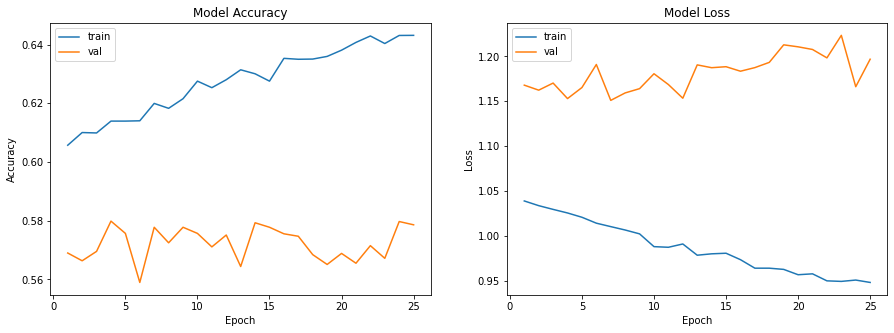

In [20]:
plot_model_history(a)

Saving the model 

In [39]:
cnn.save('shreyas_scratch_model.h5')    
# then the model was saved in h5 file so that we can use this model in future even without running the whole code again